# Business Case N° 1

## What are the most common movie categories on IMDB?

#### Required imports

In [1]:
import base
from base import db, getAnswer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")

#### Fetch and Wrangling data

In [2]:
# Select to fetch data
sql = "SELECT type, COUNT(*) as count FROM titles GROUP BY type"

# Categories data from titles table
answer = getAnswer(db, sql)

# Percentage of each movie category
answer['percent'] = round(answer['count'] / answer['count'].sum() * 100, 2)

In [3]:
# Filtering top 3 categories
answer = answer[answer['percent'] > 5]

# Merging categories less than 5% into an 'others' category
others = {}

others['count'] = answer[answer['percent'] < 5]['count'].sum()

others['percent'] = answer[answer['percent'] < 5]['percent'].sum()

others['type'] = 'others'

In [4]:
# Append the 'others' category in the top 3 categories dataset
answer = answer.append(others, ignore_index=True)

# Sort data by 'count' value
answer = answer.sort_values(by='count', ascending=False)

#### Result Plot

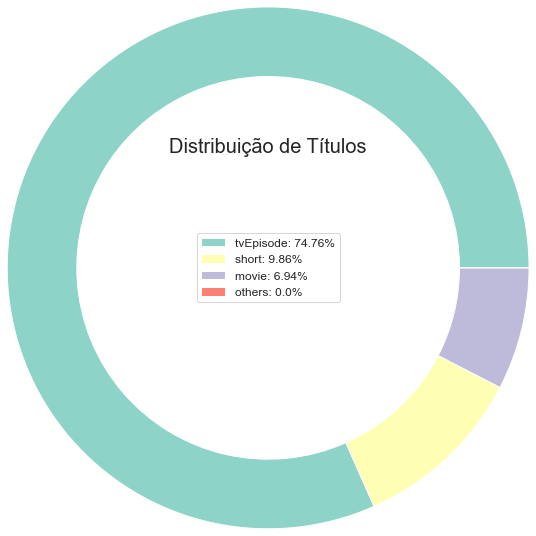

In [5]:
# Create data labels from dataset columns and values
labels = [str(answer['type'][i])+': '+str(answer['percent'][i])+'%' for i in answer.index]

# Color map by matplotlib
cs = cm.Set3(np.arange(100))

# Create a Pie Plot
f = plt.figure()
plt.pie(answer['count'], labeldistance=1, radius=3, colors=cs, wedgeprops=dict(width=.8))
plt.legend(labels=labels, loc='center', prop={'size':12})
plt.title("Distribuição de Títulos", loc='Center', fontdict={'fontsize':20, 'fontweight':20})
plt.show()